In [1]:
# Author: Gale Proulx
# Class:  CCC-410ITS
# Certification of Authenticity:
# I certify that this is my work and the DAT-330 class work,
# except where I have given fully documented references to the work
# of others. I understand the definition and consequences of plagiarism
# and acknowledge that the assessor of this assignment may, for the purpose
# of assessing this assignment reproduce this assignment and provide a
# copy to another member of academic staff and / or communicate a copy of
# this assignment to a plagiarism checking service(which may then retain a
# copy of this assignment on its database for the purpose of future
# plagiarism checking).

# IMPORT DEPENDENCIES & SET CONFIGURATION
# #####################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

INFO_COLS = ['UNITID_P', 'INSTNM', 'BRANCH', 'ADDRESS', 'CITY', 'STATE', 
             'ZIP', 'SECTOR_CD', 'SECTOR_DESC', 'MEN_TOTAL', 
             'WOMEN_TOTAL', 'TOTAL', 'YEAR']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
alt.renderers.enable('default')

RendererRegistry.enable('default')

### Data Preprocessing

In [2]:
df = pd.read_csv('MASTER_DATAFRAME.csv')

c:\users\red mage\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,UNITID_P,INSTNM,BRANCH,ADDRESS,CITY,STATE,ZIP,SECTOR_CD,SECTOR_DESC,MEN_TOTAL,WOMEN_TOTAL,TOTAL,WEAPON,YEAR,DRUG,LIQUOR,MURD,NEG_M,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,MURD_RAC,MURD_REL,MURD_SEX,MURD_GEN,MURD_DIS,MURD_ETH,NEG_M_RAC,NEG_M_REL,NEG_M_SEX,NEG_M_GEN,NEG_M_DIS,NEG_M_ETH,FORCIB_RAC,FORCIB_REL,FORCIB_SEX,FORCIB_GEN,FORCIB_DIS,FORCIB_ETH,NONFOR_RAC,NONFOR_REL,NONFOR_SEX,NONFOR_GEN,NONFOR_DIS,NONFOR_ETH,ROBBE_RAC,ROBBE_REL,ROBBE_SEX,ROBBE_GEN,ROBBE_DIS,ROBBE_ETH,AGG_A_RAC,AGG_A_REL,AGG_A_SEX,AGG_A_GEN,AGG_A_DIS,AGG_A_ETH,BURGLA_RAC,BURGLA_REL,BURGLA_SEX,BURGLA_GEN,BURGLA_DIS,BURGLA_ETH,VEHIC_RAC,VEHIC_REL,VEHIC_SEX,VEHIC_GEN,VEHIC_DIS,VEHIC_ETH,ARSON_RAC,ARSON_REL,ARSON_SEX,ARSON_GEN,ARSON_DIS,ARSON_ETH,SIM_A,SIM_A_RAC,SIM_A_REL,SIM_A_SEX,SIM_A_GEN,SIM_A_DIS,SIM_A_ETH,LAR_T,LAR_T_RAC,LAR_T_REL,LAR_T_SEX,LAR_T_GEN,LAR_T_DIS,LAR_T_ETH,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_DIS,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_DIS,VANDAL_ETH,RAPE,FONDL,INCES,STATR,MURD_GID,MURD_ET,MURD_NAT,RAPE_RAC,RAPE_REL,RAPE_SEX,RAPE_GEN,RAPE_GID,RAPE_DIS,RAPE_ET,RAPE_NAT,FOND,FOND_RAC,FOND_REL,FOND_SEX,FOND_GEN,FOND_GID,FOND_DIS,FOND_ET,FOND_NAT,INCE,INCE_RAC,INCE_REL,INCE_SEX,INCE_GEN,INCE_GID,INCE_DIS,INCE_ET,INCE_NAT,STAT,STAT_RAC,STAT_REL,STAT_SEX,STAT_GEN,STAT_GID,STAT_DIS,STAT_ET,STAT_NAT,ROBBE_GID,ROBBE_ET,ROBBE_NAT,AGG_A_GID,AGG_A_ET,AGG_A_NAT,BURGLA_GID,BURGLA_ET,BURGLA_NAT,VEHIC_GID,VEHIC_ET,VEHIC_NAT,ARSON_GID,ARSON_ET,ARSON_NAT,SIM_A_GID,SIM_A_ET,SIM_A_NAT,LAR_T_GID,LAR_T_ET,LAR_T_NAT,INTIM_GID,INTIM_ET,INTIM_NAT,VANDAL_GID,VANDAL_ET,VANDAL_NAT
0,100654001,Alabama A & M University,Main Campus,4107 MERIDIAN ST,NORMAL,AL,35762,1,"Public, 4-year or above",2413,2914,5327,1,9,0,0,0,0,10,4,8,28,132,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",BIRMINGHAM,AL,352940110,1,"Public, 4-year or above",6814,10060,16874,0,9,0,0,0,0,2,0,5,0,31,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100690001,Amridge University,Main Campus,1200 TAYLOR RD,MONTGOMERY,AL,361173553,2,"Private nonprofit, 4-year or above",360,397,757,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,35899,1,"Public, 4-year or above",4197,3484,7681,0,9,0,0,0,0,2,0,2,1,16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100724001,Alabama State University,Main Campus,915 SOUTH JACKSON ST,MONTGOMERY,AL,361040271,1,"Public, 4-year or above",2108,3456,5564,0,9,0,0,0,0,0,0,6,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# gather all columns reporting crimes
stat_cols = [col for col in df.columns if col not in INFO_COLS]
len(stat_cols)

163

In [5]:
# remove all rows with no crimes reported
important = df[df[stat_cols].sum(axis=1) != 0]
print("All Institutions Since 2009: " + str(len(list(df['INSTNM'].unique()))))
print("All Institutions Reporting Crimes: " + str(len(list(important['INSTNM'].unique()))))
print(important.shape)
important.head()

All Institutions Since 2009: 10579
All Institutions Reporting Crimes: 7193
(40399, 176)


,UNITID_P,INSTNM,BRANCH,ADDRESS,CITY,STATE,ZIP,SECTOR_CD,SECTOR_DESC,MEN_TOTAL,WOMEN_TOTAL,TOTAL,WEAPON,YEAR,DRUG,LIQUOR,MURD,NEG_M,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,MURD_RAC,MURD_REL,MURD_SEX,MURD_GEN,MURD_DIS,MURD_ETH,NEG_M_RAC,NEG_M_REL,NEG_M_SEX,NEG_M_GEN,NEG_M_DIS,NEG_M_ETH,FORCIB_RAC,FORCIB_REL,FORCIB_SEX,FORCIB_GEN,FORCIB_DIS,FORCIB_ETH,NONFOR_RAC,NONFOR_REL,NONFOR_SEX,NONFOR_GEN,NONFOR_DIS,NONFOR_ETH,ROBBE_RAC,ROBBE_REL,ROBBE_SEX,ROBBE_GEN,ROBBE_DIS,ROBBE_ETH,AGG_A_RAC,AGG_A_REL,AGG_A_SEX,AGG_A_GEN,AGG_A_DIS,AGG_A_ETH,BURGLA_RAC,BURGLA_REL,BURGLA_SEX,BURGLA_GEN,BURGLA_DIS,BURGLA_ETH,VEHIC_RAC,VEHIC_REL,VEHIC_SEX,VEHIC_GEN,VEHIC_DIS,VEHIC_ETH,ARSON_RAC,ARSON_REL,ARSON_SEX,ARSON_GEN,ARSON_DIS,ARSON_ETH,SIM_A,SIM_A_RAC,SIM_A_REL,SIM_A_SEX,SIM_A_GEN,SIM_A_DIS,SIM_A_ETH,LAR_T,LAR_T_RAC,LAR_T_REL,LAR_T_SEX,LAR_T_GEN,LAR_T_DIS,LAR_T_ETH,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_DIS,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_DIS,VANDAL_ETH,RAPE,FONDL,INCES,STATR,MURD_GID,MURD_ET,MURD_NAT,RAPE_RAC,RAPE_REL,RAPE_SEX,RAPE_GEN,RAPE_GID,RAPE_DIS,RAPE_ET,RAPE_NAT,FOND,FOND_RAC,FOND_REL,FOND_SEX,FOND_GEN,FOND_GID,FOND_DIS,FOND_ET,FOND_NAT,INCE,INCE_RAC,INCE_REL,INCE_SEX,INCE_GEN,INCE_GID,INCE_DIS,INCE_ET,INCE_NAT,STAT,STAT_RAC,STAT_REL,STAT_SEX,STAT_GEN,STAT_GID,STAT_DIS,STAT_ET,STAT_NAT,ROBBE_GID,ROBBE_ET,ROBBE_NAT,AGG_A_GID,AGG_A_ET,AGG_A_NAT,BURGLA_GID,BURGLA_ET,BURGLA_NAT,VEHIC_GID,VEHIC_ET,VEHIC_NAT,ARSON_GID,ARSON_ET,ARSON_NAT,SIM_A_GID,SIM_A_ET,SIM_A_NAT,LAR_T_GID,LAR_T_ET,LAR_T_NAT,INTIM_GID,INTIM_ET,INTIM_NAT,VANDAL_GID,VANDAL_ET,VANDAL_NAT
0,100654001,Alabama A & M University,Main Campus,4107 MERIDIAN ST,NORMAL,AL,35762,1,"Public, 4-year or above",2413,2914,5327,1,9,0,0,0,0,10,4,8,28,132,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",BIRMINGHAM,AL,352940110,1,"Public, 4-year or above",6814,10060,16874,0,9,0,0,0,0,2,0,5,0,31,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,35899,1,"Public, 4-year or above",4197,3484,7681,0,9,0,0,0,0,2,0,2,1,16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100724001,Alabama State University,Main Campus,915 SOUTH JACKSON ST,MONTGOMERY,AL,361040271,1,"Public, 4-year or above",2108,3456,5564,0,9,0,0,0,0,0,0,6,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100751001,The University of Alabama,Main Campus,946 University Blvd,TUSCALOOSA,AL,354870180,1,"Public, 4-year or above",13434,15265,28699,0,9,1,0,0,0,2,0,10,4,92,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# remove all 2 year instiutions
important = important.loc[important['SECTOR_CD'] < 4]
important = important.loc[important['SECTOR_CD'] > 0]
important.shape

(22785, 176)

In [7]:
# only include main campus and remove all columns with no crimes reported
important = important.loc[important['BRANCH'].str.contains('Main Campus', case=False, regex=False)]
important = important[stat_cols + INFO_COLS]
important.shape

(11591, 176)

In [8]:
# generate list off all columns that have at least one crime reported
stat_cols = [col for col in stat_cols if important[col].sum() > 0]
len(stat_cols)

94

### Data Visualizations

In [9]:
# find all colleges that reported crimes in respective categories
year_list = list()
institutions = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    institutions.append(important.loc[important['YEAR'] == year].shape[0])
    
print(year_list)
print(institutions)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[1324, 1356, 1356, 1332, 1327, 1294, 1211, 1201, 1190]


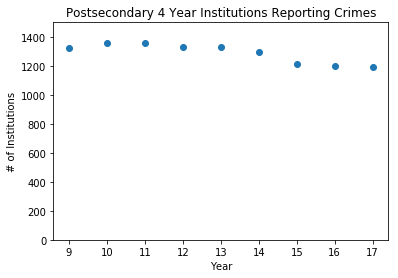

In [10]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Reporting Crimes')
ax.scatter(year_list, institutions)
ax.set_ylabel('# of Institutions')
ax.set_xlabel('Year')
ax.set_ylim([0,1500])
ax.set_yticks(range(0, 1500, 200))
plt.show()

In [11]:
sectors = list(important['SECTOR_DESC'].unique())
inst_public = list()
inst_priv_profit = list()
inst_priv_non = list()

# find all colleges that reported crimes in respective categories
year_list = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    for sector in sectors:
        if sector == "Public, 4-year or above":
            inst_public.append(important.loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].shape[0])
        elif sector == "Private nonprofit, 4-year or above":
            inst_priv_non.append(important.loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].shape[0])
        else:
            inst_priv_profit.append(important.loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].shape[0])
            
print(year_list)
print(inst_public)
print(inst_priv_non)
print(inst_priv_profit)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[418, 410, 401, 403, 400, 392, 379, 379, 370]
[804, 851, 842, 829, 824, 796, 788, 771, 771]
[102, 95, 113, 100, 103, 106, 44, 51, 49]


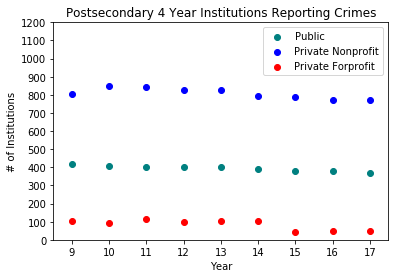

In [12]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Reporting Crimes')
ax.scatter(year_list, inst_public, c='teal', label='Public')
ax.scatter(year_list, inst_priv_non, c='blue', label='Private Nonprofit')
ax.scatter(year_list, inst_priv_profit, c='red', label='Private Forprofit')
ax.set_ylabel('# of Institutions')
ax.set_xlabel('Year')
ax.legend(loc=1)
ax.set_ylim([0,1200])
ax.set_yticks(range(0, 1201, 100))
plt.show()

In [59]:
sectors = list(important['SECTOR_DESC'].unique())
inst_public = list()
inst_priv_profit = list()
inst_priv_non = list()

# find all colleges that reported crimes in respective categories
year_list = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    for sector in sectors:
        if sector == "Public, 4-year or above":
            inst_public.append(important['TOTAL'].loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].sum().sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
        elif sector == "Private nonprofit, 4-year or above":
            inst_priv_non.append(important['TOTAL'].loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].sum().sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
        else:
            inst_priv_profit.append(important['TOTAL'].loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].sum().sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
            
print(year_list)
print(inst_public)
print(inst_priv_non)
print(inst_priv_profit)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.6607772571685816, 0.6432731227208891, 0.64449615853765, 0.6450139622647473, 0.6531792126451889, 0.6439362970939683, 0.6438152448419389, 0.6449379113197431, 0.6407374851883861]
[0.3070395094208006, 0.32038330341557963, 0.32019503438081026, 0.32103702592516187, 0.33015930972435487, 0.31492215901053766, 0.32373921800860345, 0.3189831749624119, 0.325882917004793]
[0.03218323341061774, 0.036343573863531285, 0.0353088070815398, 0.03394901181009083, 0.016661477630456285, 0.04114154389549411, 0.03244553714945771, 0.036078913717844996, 0.03337959780682087]


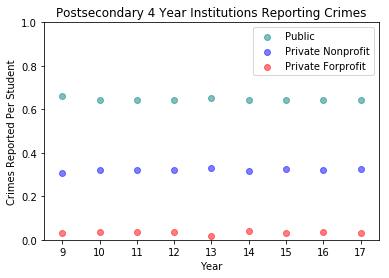

In [62]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Reporting Crimes')
ax.scatter(year_list, inst_public, c='teal', label='Public', alpha=0.5)
ax.scatter(year_list, inst_priv_non, c='blue', label='Private Nonprofit', alpha=0.5)
ax.scatter(year_list, inst_priv_profit, c='red', label='Private Forprofit', alpha=0.5)
ax.set_ylabel('Crimes Reported Per Student')
ax.set_xlabel('Year')
ax.legend(loc=0)
ax.set_ylim([0,1])
plt.show()

In [15]:
# find all columns regarding rape
rape_cols = [col for col in important.columns if 'RAPE' in col]
rape_cols

['RAPE',
 'RAPE_RAC',
 'RAPE_REL',
 'RAPE_SEX',
 'RAPE_GEN',
 'RAPE_GID',
 'RAPE_DIS',
 'RAPE_ET',
 'RAPE_NAT']

In [16]:
important[rape_cols].loc[important['YEAR'] == year].sum()

RAPE        8222
RAPE_RAC       0
RAPE_REL       0
RAPE_SEX       0
RAPE_GEN       0
RAPE_GID       0
RAPE_DIS       0
RAPE_ET        0
RAPE_NAT       0
dtype: int64

In [17]:
# find all colleges that reported crimes in respective categories
year_list = list()
institutions = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    institutions.append(important[rape_cols].loc[important['YEAR'] == year].sum().sum())
    
print(year_list)
print(institutions)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 0, 0, 0, 0, 6011, 6563, 7552, 8222]


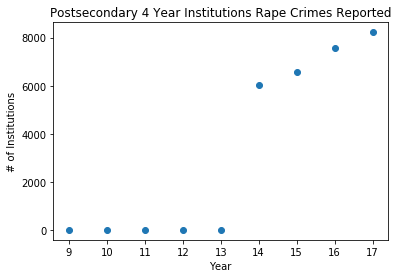

In [18]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Rape Crimes Reported')
ax.scatter(year_list, institutions)
ax.set_ylabel('# of Institutions')
ax.set_xlabel('Year')
plt.show()

In [48]:
sectors = list(important['SECTOR_DESC'].unique())
inst_public = list()
inst_priv_profit = list()
inst_priv_non = list()

# find all colleges that reported crimes in respective categories
year_list = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    for sector in sectors:
        if sector == "Public, 4-year or above":
            inst_public.append(important[rape_cols].loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].sum().sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
        elif sector == "Private nonprofit, 4-year or above":
            inst_priv_non.append(important[rape_cols].loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].sum().sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
        else:
            inst_priv_profit.append(important[rape_cols].loc[(important['YEAR'] == year) & (important['SECTOR_DESC'] == sector)].sum().sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
            
print(year_list)
print(inst_public)
print(inst_priv_non)
print(inst_priv_profit)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.00036205111377826844, 0.0004065460523885844, 0.00047339588434942403, 0.0005301406967548666]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0003889348536632613, 0.0004420556533941541, 0.0004964162221105071, 0.0005289769732741851]
[0.0, 0.0, 0.0, 0.0, 0.0, 4.145623440209181e-06, 1.943956259428998e-06, 1.4146576277760566e-06, 4.0083808779026496e-06]


In [49]:
statistic = 'reported_rape'

df = pd.DataFrame(year_list, columns=['year'])
df[statistic] = inst_public
df['sector'] = 'Public Institution'
df

temp_df = pd.DataFrame(year_list, columns=['year'])
temp_df[statistic] = inst_priv_non
temp_df['sector'] = 'Private-Nonprofit Institution'
temp_df

df = df.append(temp_df)
df

temp_df = pd.DataFrame(year_list, columns=['year'])
temp_df[statistic] = inst_priv_profit
temp_df['sector'] = 'Private-Forprofit Institution'
temp_df

df = df.append(temp_df)
df

,year,reported_rape,sector
0,9,0.000000,Public Institution
1,10,0.000000,Public Institution
2,11,0.000000,Public Institution
3,12,0.000000,Public Institution
4,13,0.000000,Public Institution
5,14,0.000362,Public Institution
6,15,0.000407,Public Institution
7,16,0.000473,Public Institution
8,17,0.000530,Public Institution
0,9,0.000000,Private-Nonprofit Institution


In [45]:
scatter = alt.Chart(df).mark_circle(size=100).encode(
    x='year',
    y=statistic,
    color='sector',
    tooltip=['year', statistic, 'sector']
).properties(
    title='Total Reported Crimes of Rape by Institution Sector'
).interactive()
scatter.save('visualizations/rape_stats.html')
scatter

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


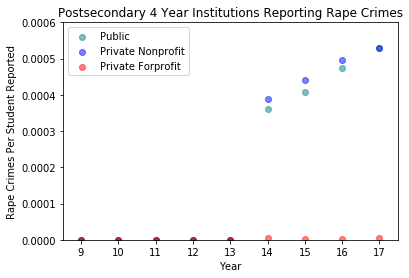

In [58]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Reporting Rape Crimes')
ax.scatter(year_list, inst_public, c='teal', label='Public', alpha=0.5)
ax.scatter(year_list, inst_priv_non, c='blue', label='Private Nonprofit', alpha=0.5)
ax.scatter(year_list, inst_priv_profit, c='red', label='Private Forprofit', alpha=0.5)
ax.set_ylabel('Rape Crimes Per Student Reported')
ax.set_xlabel('Year')
ax.legend(loc=2)
ax.set_ylim([0,0.0006])
plt.show()

In [64]:
# find all colleges that reported crimes in respective categories
year_list = list()
institutions = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    institutions.append(important['LIQUOR'].loc[important['YEAR'] == year].sum() / important['TOTAL'].loc[important['YEAR'] == year].sum())
    
print(year_list)
print(institutions)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.00022213261353988832, 0.03814492441108601, 0.040709037902583164, 0.0390919100069401, 0.03806618887132276, 0.036975946087800284, 0.03527425270109482, 0.032622004896515865, 0.028650872094376424]


In [65]:
important['LIQUOR'].loc[important['YEAR'] == 9].sum()

1803

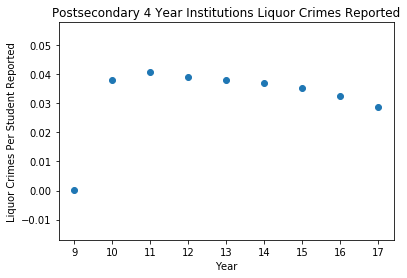

In [66]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Liquor Crimes Reported')
ax.scatter(year_list, institutions)
ax.set_ylabel('Liquor Crimes Per Student Reported')
ax.set_xlabel('Year')
plt.show()

### Confidence Score Engineering

In [26]:
# generate list off all columns that have at least 50 crime reported
stat_cols = [col for col in stat_cols if important[col].sum() > 90]
len(stat_cols)

32

In [27]:
# Make average crimes per students for each column across all institutions.
col_means = pd.DataFrame(columns=stat_cols)

col_means.loc[0, stat_cols] = important[stat_cols].mean(axis=0) / important['TOTAL'].mean(axis=0)
col_means

,WEAPON,DRUG,LIQUOR,MURD,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,BURGLA_RAC,SIM_A,SIM_A_RAC,SIM_A_SEX,LAR_T,LAR_T_RAC,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_ETH,RAPE,FONDL,STATR
0,0.000269825,0.0100858,0.0322007,2.28052e-06,0.000313335,2.80894e-06,0.000215301,0.000299235,0.00205749,0.000316506,8.94966e-05,1.34885e-06,8.19041e-06,3.39297e-06,2.46129e-06,2.66988e-06,1.41837e-06,3.55289e-05,1.41281e-05,3.85186e-06,8.99694e-06,3.26782e-06,2.2249e-06,4.39974e-05,1.6937e-05,9.35848e-06,1.20005e-05,1.474e-06,2.11365e-06,0.000393988,0.000173681,2.9758e-06


In [28]:
# Make dataframe to record percentage difference bewteen instituion average crime per student compared to national average.
school_confs = pd.DataFrame(columns=stat_cols, index=important['INSTNM'].unique())
school_confs.head()

,WEAPON,DRUG,LIQUOR,MURD,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,BURGLA_RAC,SIM_A,SIM_A_RAC,SIM_A_SEX,LAR_T,LAR_T_RAC,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_ETH,RAPE,FONDL,STATR
Alabama A & M University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University of Alabama at Birmingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
University of Alabama in Huntsville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alabama State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The University of Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Calculate confidence interval for every institution.
schools = list(important['INSTNM'].unique())
    
for school in schools:
    cps = important[important['INSTNM'] == school][stat_cols].mean(axis=0) / important[important['INSTNM'] == school]['TOTAL'].mean()
    cps_avg_diff = (abs(cps.values - col_means[stat_cols].values) / col_means[stat_cols].values) * 100
    school_confs.loc[school] = cps_avg_diff
    
    show_progress = schools.index(school) % 500 == 0
    if show_progress:
        print("Done " + str(schools.index(school)) + " of " + str(len(schools)))
        
school_confs.head(2)

Done 0 of 2093
Done 500 of 2093
Done 1000 of 2093
Done 1500 of 2093
Done 2000 of 2093


,WEAPON,DRUG,LIQUOR,MURD,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,BURGLA_RAC,SIM_A,SIM_A_RAC,SIM_A_SEX,LAR_T,LAR_T_RAC,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_ETH,RAPE,FONDL,STATR
Alabama A & M University,432.083,129.586,89.8727,100,116.007,2820.66,328.677,324.954,319.67,35.1991,243.754,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,42.7372,52.7643,100
University of Alabama at Birmingham,15.1751,50.8516,66.406,164.111,78.8552,100,6.3064,59.7432,68.9694,65.5613,52.89,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,51.0798,47.9813,507.209


In [30]:
# Calculate the average confidence score for each institution.
school_confs['confidence_score'] = school_confs.mean(axis=1)
school_confs.sort_values(by='confidence_score', ascending=True).head(100)

,WEAPON,DRUG,LIQUOR,MURD,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,BURGLA_RAC,SIM_A,SIM_A_RAC,SIM_A_SEX,LAR_T,LAR_T_RAC,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_ETH,RAPE,FONDL,STATR,confidence_score
University of Cincinnati-Main Campus,22.1853,53.4325,53.3838,100,1.03269,100,65.0354,43.5718,14.5934,40.8062,49.4697,100,97.1943,4.7972,162.48,100,100,0.00952019,37.182,100,64.0966,1.15113,45.1843,26.5819,61.8563,38.0653,46.1657,119.146,52.8256,45.0685,42.3448,100,58.989376
University of Utah,67.3752,35.6218,52.0713,54.4028,39.3161,100,85.2807,34.1031,38.6235,192.593,33.1145,100,57.0084,100,43.0625,100,100,10.8029,50.1534,82.8307,17.4129,7.75343,100,35.9746,37.6304,24.7487,41.3162,100,100,27.6079,9.47886,100,61.821332
University of Virginia-Main Campus,38.3135,68.0944,0.654683,100,133.14,100,39.8713,30.4704,16.4023,21.2456,63.8373,100,12.9,36.2666,87.8477,73.1721,100,43.1466,1.82367,20.0327,156.948,100,100,26.4402,100,100,54.1092,100,100,54.9033,19.7924,100,65.606622
University of Arizona,82.957,23.8834,3.44568,137.233,36.978,100,59.7947,15.0244,31.3704,35.8921,30.4815,100,0.918093,139.177,100,100,100,6.59223,14.8804,180.911,39.8668,17.2209,100,4.52035,27.7706,42.19,32.3763,100,283.942,14.1766,54.8327,100,66.138607
University of Georgia,1.09476,66.9234,42.6101,100,30.9552,100,38.8361,47.61,13.8345,19.7594,40.1344,100,23.4376,7.59173,27.3877,100,100,47.0506,33.1552,100,100,100,100,99.5364,159.168,34.0126,161.27,100,100,26.7857,25.9846,100,67.098070
University of Minnesota-Twin Cities,74.4719,24.5767,6.74878,100,5.19736,100,39.9695,47.4877,52.7119,34.6586,59.1122,100,21.1564,26.8822,100,100,100,75.7658,100,100,28.2243,100,100,75.5379,100,53.9982,64.126,100,100,49.1898,14.4841,100,67.321852
Florida State University,65.7106,41.614,49.1685,100,53.1028,100,3.64089,29.0676,12.1556,61.6363,48.9884,100,33.5512,19.7985,100,103.846,100,69.3633,100,29.3532,9.26196,100,100,62.8903,100,74.4651,100,100,100,5.67476,93.7329,100,67.719419
Louisiana State University and Agricultural & Mechanical College,15.9406,58.1791,81.141,100,61.4716,160.474,30.8342,21.0316,5.79266,17.8948,38.6858,100,10.6693,100,48.6321,100,100,17.627,55.3615,5.02571,59.3387,100,100,83.3705,100,21.8191,100,100,100,60.0735,76.8305,145.868,68.001917
North Carolina State University at Raleigh,18.0443,42.8325,42.3639,100,51.2201,100,2.71066,31.4998,39.6221,1.71982,56.3959,100,20.5898,100,32.126,100,100,90.8468,76.982,100,100,100,100,92.6086,100,100,72.9011,100,100,6.72879,6.37986,100,68.299132
University of Kansas,64.3657,7.84406,57.6586,100,30.9566,100,19.9869,53.1409,1.27927,36.7113,37.33,100,2.17218,100,225.54,100,100,66.1719,71.6434,100,10.9419,100,100,63.5774,100,14.3825,100,100,100,8.48388,19.9468,100,68.504165
